In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('Supermart grocary sales clean.csv')
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit,year,month,original_price,discount_amount
0,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,2017,11,913.414634,164.414634
1,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,2017,6,2987.341772,627.341772
2,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,2016,10,1194.666667,298.666667
3,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,2016,10,3182.432432,827.432432
4,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,2015,6,3114.864865,809.864865


In [3]:
df.corr()

,sale_price,discount,profit,year,month,original_price,discount_amount
sale_price,1.000000,-0.005573,0.605359,0.007552,-0.009478,0.965448,0.652848
discount,-0.005573,1.000000,0.000033,-0.018745,0.002207,0.236701,0.700032
profit,0.605359,0.000033,1.000000,-0.006404,0.003174,0.584599,0.395663
year,0.007552,-0.018745,-0.006404,1.000000,-0.020208,0.004427,-0.003395
month,-0.009478,0.002207,0.003174,-0.020208,1.000000,-0.007740,-0.002087
original_price,0.965448,0.236701,0.584599,0.004427,-0.007740,1.000000,0.827690
discount_amount,0.652848,0.700032,0.395663,-0.003395,-0.002087,0.827690,1.000000


## The Goal Regression Model
Memprediksi penjualan perusahaan berdasarkan
1. Penjualan sebelum discount `original_price`
2. laba perusahaan `profit`
3. Diskon `discount`

In [22]:
df_train = df[['discount', 'original_price', 'profit', 'sale_price']]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   discount        9993 non-null   float64
 1   original_price  9993 non-null   float64
 2   profit          9993 non-null   float64
 3   sale_price      9993 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 312.4 KB


In [24]:
X = np.array(df_train[['discount', 'original_price', 'profit']])
y = np.array(df_train['sale_price'])

In [25]:
X.shape

(9993, 3)

In [26]:
y.shape

(9993,)

In [29]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Train Model

## Linear Regression
Formula Linear Regression: $y = \alpha + \beta x$ 

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
print(f'intercept: {reg.intercept_}')
print(f'slope: {reg.coef_}')

intercept: 448.88070809905525
slope: [-1.91140227e+03  7.53059704e-01  2.71084902e-02]


Variance score: 0.9899554134880288


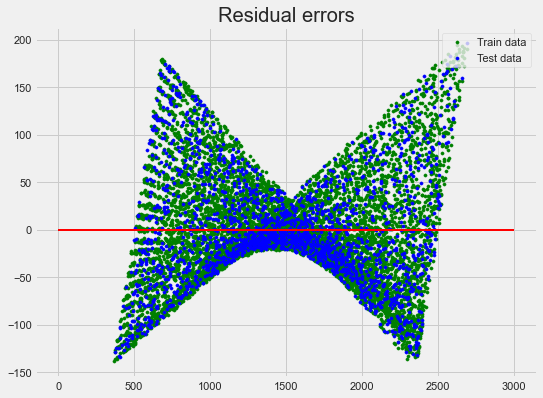

In [89]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
plt.figure(figsize=(8,6))
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 3000, linewidth = 2, color='red')
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

## Evaluasi Model

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$


$SS_{res} =  \sum_{i=1}^{n}(y_i - f(x_i))^2$


$SS_{tot} =  \sum_{i=1}^{n}(y_i - \bar{y})^2$

In [73]:
from sklearn.metrics import r2_score

y_pred = reg.predict(X_test)

r_2 = r2_score(y_test, y_pred)
print(f'R_Squared: {r_2}')

R_Squared: 0.9899554134880288


#### Note
- Semakin dekat nilai `R2` dengan 1 maka model semakin baik
- Semakin dekat nilai `R2` dengan -1 maka model semakin buruk

### Mean Absolute Error (MAE) atau Mean Absolute Deviation (MAD)

$MAE$ is the average of the absolute values of the errors of the predictions.

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

In [74]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

MAE: 44.34559181706889


### Mean Squared Error (MSE) atau Mean Squared Deviation (MSD)

$MSE$ is the average of the squares of the errors of the predictions.

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [75]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print(f'MSE: {MSE}')

MSE: 3384.534148536087


### Root Mean Squared Error (RMSE)
$RMSE$ is the rooted average of the squares of the errors of the predictions.

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}}_i)^2$

In [76]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'RMSE: {RMSE}')

RMSE: 58.17674920907911
